### Build a Simple Workflow or Graph Using LangGraph

#### State
First, define the State of the graph.

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the TypedDict class from python's typing module as our schema, which provides type hints for the keys.

In [38]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str
  

#### Nodes
Nodes are just python functions.

The first positional argument is the state, as defined above.

Because the state is a TypedDict with schema as defined above, each node can access the key, graph_state, with state['graph_state'].

Each node returns a new value of the state key graph_state.

By default, the new value returned by each node will override the prior state value.

In [32]:
def start_play(state:State):
    print("start_play node has been called")
    return {"graph_info":state["graph_info"]+"This is a simple graph example."}

def cricket(state:State):
    print("cricket node has been called")
    return {"graph_info":state["graph_info"]+"I love cricket."} 

def batminton(state:State):
    print("badminton node has been called")
    return {"graph_info":state["graph_info"]+"I love badminton."}


In [41]:
# Make sure the cell defining State is executed before running this cell

import random
from typing import Literal

try:
    State
except NameError:
    from typing_extensions import TypedDict
    class State(TypedDict):
        graph_info: str

def random_play(state: State) -> Literal['cricket', 'badminton']:
    graph_info = state['graph_info']

    if random.random() > 0.5:
        return "cricket"
    else:
        return "badminton"

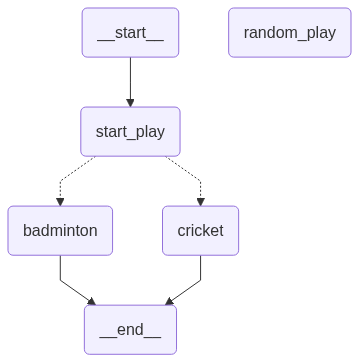

In [47]:
#%pip install langgraph

from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END

# BUILDING GRAPH
graph = StateGraph(State)

# adding nodes  
graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("badminton", batminton)
graph.add_node("random_play", random_play)

# adding edges  
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", END)
graph.add_edge("badminton", END)



## Compile the graph
graph_builder=graph.compile()

## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [46]:
### graph invocation

graph_builder.invoke({"graph_info":"my name is Anems. "})

start_play node has been called
badminton node has been called


{'graph_info': 'my name is Anems. This is a simple graph example.I love badminton.'}